### 伯乐在线
- [从头开始：实现神经网络](http://python.jobbole.com/82208/)

In [5]:
import sklearn
from sklearn import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### 1. 生成训练数据

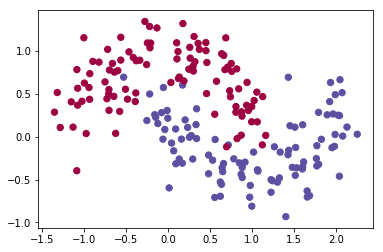

In [6]:
# 使用sklearn生成月牙形数据
np.random.seed(0)
trainData, trainLabel = sklearn.datasets.make_moons(200,noise=0.20)
plt.scatter(trainData[:,0],trainData[:,1],s=40,c=trainLabel,cmap=plt.cm.Spectral)
plt.show()


## 这里之后要考虑使用 mxnet+gulon快速生成一个样板

### 2. 生成绘图用的数据
- 以训练数据的```min``` ```max```为区间
- 以 ```h``` 为生成数据的间隔

In [12]:
# Plot the decision boundary
# plot_decision_boundary(lambda x: clf.predict(x))
# plt.title("Logistic Regression")
# 生成测试数据（数据区间在训练数据X的 min~max 间以0.1为间隔生成数据）
f1_min, f1_max = trainData[:, 0].min() - .5, trainData[:, 0].max() + .5
f2_min, f2_max = trainData[:, 1].min() - .5, trainData[:, 1].max() + .5
h = 0.01
f1_xx, f2_yy = np.meshgrid(np.arange(f1_min, f1_max, h), np.arange(f2_min, f2_max, h))
drawData = np.c_[f1_xx.ravel(), f2_yy.ravel()]
# <<<
drawData
f1_xx,
f2_yy
# >>>

array([[-1.85462041, -1.43206382],
       [-1.84462041, -1.43206382],
       [-1.83462041, -1.43206382],
       ..., 
       [ 2.72537959,  1.83793618],
       [ 2.73537959,  1.83793618],
       [ 2.74537959,  1.83793618]])

(array([[-1.85462041, -1.84462041, -1.83462041, ...,  2.72537959,
          2.73537959,  2.74537959],
        [-1.85462041, -1.84462041, -1.83462041, ...,  2.72537959,
          2.73537959,  2.74537959],
        [-1.85462041, -1.84462041, -1.83462041, ...,  2.72537959,
          2.73537959,  2.74537959],
        ..., 
        [-1.85462041, -1.84462041, -1.83462041, ...,  2.72537959,
          2.73537959,  2.74537959],
        [-1.85462041, -1.84462041, -1.83462041, ...,  2.72537959,
          2.73537959,  2.74537959],
        [-1.85462041, -1.84462041, -1.83462041, ...,  2.72537959,
          2.73537959,  2.74537959]]),)

array([[-1.43206382, -1.43206382, -1.43206382, ..., -1.43206382,
        -1.43206382, -1.43206382],
       [-1.42206382, -1.42206382, -1.42206382, ..., -1.42206382,
        -1.42206382, -1.42206382],
       [-1.41206382, -1.41206382, -1.41206382, ..., -1.41206382,
        -1.41206382, -1.41206382],
       ..., 
       [ 1.81793618,  1.81793618,  1.81793618, ...,  1.81793618,
         1.81793618,  1.81793618],
       [ 1.82793618,  1.82793618,  1.82793618, ...,  1.82793618,
         1.82793618,  1.82793618],
       [ 1.83793618,  1.83793618,  1.83793618, ...,  1.83793618,
         1.83793618,  1.83793618]])

***
### <center><font color='blue'> 使用LR模型</font></center>
### <font color='blue'>3.1 使用训练数据训练LR模型</font>

In [13]:
# Train the logistic rgeression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(trainData, trainLabel)

# 参数及截距
# <<<
clf.coef_
clf.intercept_
# >>>

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

array([[ 1.11875874, -4.00399727]])

array([ 0.51100238])

- ``` np.arange(f1_min, f1_max, h) ``` ： 以```h```为间隔生成从 ```f_min```到```f_max```的数据
- ``` np.meshgrid(a,b) ``` : 以 len(a) 为列数，以 len(b) 为行数，生成两个相同size的二维数组（矩阵）对于a是行复制。对于b是列复制
- ``` list.ravel()``` ：把二维数组（矩阵）拍扁为一维数组，如：<br>
```array([[1, 2, 3],[1, 2, 3]]) => array([1, 2, 3, 1, 2, 3])```
- ```np.c_[r1.ravel(),r2.ravel()]``` : 把两个一维数组做交叉


    
           
    


### <font color='blue'>3.2  LR模型结果绘制</font>
- 使用之前生成的绘图数据，进行clf.predict()

In [14]:
drawLabel=clf.predict(drawData)

#<<<
drawLabel
drawLabel.shape
np.bincount(drawLabel)
f1_xx.shape
#>>>

drawLabel=drawLabel.reshape(f1_xx.shape)

#<<<
drawLabel
drawLabel.shape
#>>>

array([1, 1, 1, ..., 0, 0, 0])

(151208,)

array([73336, 77872])

(328, 461)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(328, 461)

### <font color='blue'>3.3 绘制LR结果</font>

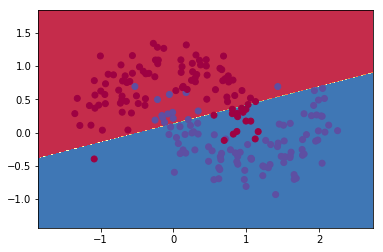

In [15]:
# 绘制分割线条
plt.contourf(f1_xx, f2_yy, drawLabel, cmap=plt.cm.Spectral)
# 绘制原始训练集的点
plt.scatter(trainData[:, 0], trainData[:, 1], c=trainLabel, cmap=plt.cm.Spectral)
# 展示 
plt.show()

***
### <center><font color='red'>神经网络实现</font></center>
### <font color = 'red'>4.1 定义常用参数</font>

In [17]:
# 定义参数
num_examples = len(trainData)
nn_input_dim = 2 # 输入层的维度（节点）
nn_output_dim = 2 # 输出层的维度（节点）

epsilon = 0.01 # 梯度下降学习速率
reg_lambda = 0.01 # 正则化

### <font color='red'>4.2 定义损失函数</font>

- 这里np.tanh(z1) 是一个函数  (e^x - e^(-x))/(e^x + e^(-x))
- 更多参考 [知乎](https://www.zhihu.com/question/63212226?from=profile_question_card)

In [27]:
def calculate_loss(model):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    # Forward propagation to calculate our predictions
    z1 = trainData.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples),trainLabel])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1))) + np.sum(np.square(W2))
    return (data_loss*1.0)/num_examples

### <font color='red'>4.3 实现一个辅助函数来计算网络的输出</font>
- 其工作是传递前面定义的前向传播并返回概率最高的类别

In [28]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

### <font color='red'> 4.4 训练神经网络的函数</font>
- 使用“后向传播导数”实现批量梯度下降

In [29]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
 
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
 
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
 
        # Forward propagation
        z1 = trainData.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), trainLabel] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(trainData.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
 
        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
 
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print ("Loss after iteration %s : %s"% (i, calculate_loss(model)))
    return model

### <font color='red'>4.5 训练隐藏层为3的神经网络 </font>

Loss after iteration 0 : 0.441253794629
Loss after iteration 1000 : 0.502983184152
Loss after iteration 2000 : 0.538609574361
Loss after iteration 3000 : 0.554329037784
Loss after iteration 4000 : 0.560514698291
Loss after iteration 5000 : 0.563868753612
Loss after iteration 6000 : 0.565748186024
Loss after iteration 7000 : 0.566819391218
Loss after iteration 8000 : 0.56743169832
Loss after iteration 9000 : 0.567778046461
Loss after iteration 10000 : 0.567968944671
Loss after iteration 11000 : 0.568069111653
Loss after iteration 12000 : 0.568116875975
Loss after iteration 13000 : 0.568135003265
Loss after iteration 14000 : 0.568136965753
Loss after iteration 15000 : 0.568130657872
Loss after iteration 16000 : 0.568120627225
Loss after iteration 17000 : 0.56810942239
Loss after iteration 18000 : 0.568098408408
Loss after iteration 19000 : 0.568088259278


Text(0.5,1,'Decision Boundary for hidden layer size 3')

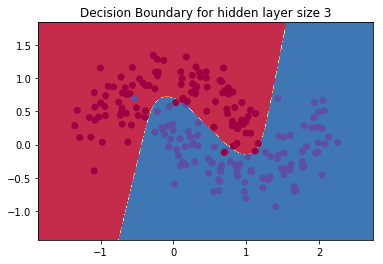

In [31]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = trainData[:, 0].min() - .5, trainData[:, 0].max() + .5
    y_min, y_max = trainData[:, 1].min() - .5, trainData[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(trainData[:, 0], trainData[:, 1], c=trainLabel, cmap=plt.cm.Spectral)
    
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()



### 生成图像的方法

### 关于 np.meshgrid(a,b) 的使用

In [102]:
a = (1,2,3)
b = ("a","b")
ra,rb = np.meshgrid(a,b)
ra
rb

array([[1, 2, 3],
       [1, 2, 3]])

array([['a', 'a', 'a'],
       ['b', 'b', 'b']],
      dtype='<U1')

In [ ]:
# 完整代码
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2

    # Assign new parameters to the model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    # Optionally print the loss.
    # This is expensive because it uses the whole dataset, so we don't want to do it too often.
    if print_loss and i % 1000 == 0:
    print "Loss after iteration %i: %f" %(i, calculate_loss(model))

    return model

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

# Build a model with a 3-dimensional hidden layer
#model = build_model(3, print_loss=True)

# Plot the decision boundary
#plot_decision_boundary(lambda X: predict(model, X))
#plt.title("Decision Boundary for hidden layer size 3")
#plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
plt.subplot(5, 2, i+1)
plt.title('Hidden Layer size %d' % nn_hdim)
model = build_model(nn_hdim)
plot_decision_boundary(lambda X: predict(model, X))
plt.show()